# Creating a driven control

This notebook illustrates how to use Q-CTRL Open Controls to create a driven control.

A driven control represents a continuous drive on the transition of a qubit with a tunable detuning. The Open Controls package allows you to generate driven controls that enact dynamically corrected gates. These dynamically corrected gates are able to achieve arbitrary rotations of the Bloch sphere, in a manner that is robust to dephasing and/or control noise. Dynamically corrected gates can be used as drop-in gate replacements to suppress errors in a quantum computation.

Q-CTRL Open Controls can be used to create a driven control from a library of well-known control schemes. Once created, it can be printed, plotted, and exported in CSV or JSON format for use on a quantum computer or any of [Q-CTRL's products](https://q-ctrl.com/products/).

To run this notebook, you need to install [qctrl-visualizer](https://docs.q-ctrl.com/boulder-opal/references/qctrl-visualizer/installation.html) first.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qctrlvisualizer import plot_controls
from qctrlopencontrols import (
    DrivenControl,
    new_bb1_control,
    new_primitive_control,
    new_sk1_control,
    new_corpse_control,
)

## Predefined driven control schemes

Q-CTRL Open Controls can create driven controls according to the following dynamically corrected gate protocols:

1. [Primitive](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_primitive_control.html)
2. [BB1](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_bb1_control.html)
3. [SK1](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_sk1_control.html)
4. [CORPSE](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_corpse_control.html)
5. [WAMF1](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_wamf1_control.html)
6. [SCROFULOUS](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_scrofulous_control.html)
7. [CORPSE in BB1](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_corpse_in_bb1_control.html)
8. [CORPSE in SK1](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_corpse_in_sk1_control.html)
9. [CORPSE in SCROFULOUS](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/new_corpse_in_scrofulous_control.html)

See the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols.html) for details.

## Creating and printing a driven control

A driven control is made of a continuous drive on the qubit transition with a tunable detuning. The continuous drive is described by a piecewise constant function made of a list of segments. Each drive segment has a `rabi_rate` applied at an `azimuthal_angle` for a `duration`, with a `detuning`. The mathematical definition of a driven control is explained in the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/DrivenControl.html).

Q-CTRL Open Controls can generate a driven control from a library of dynamically corrected gate schemes, mathematically defined in the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/DynamicDecouplingSequence.html#). All dynamically corrected gates are derived from three quantities: 

* `rabi_rotation` the total rotation of the Bloch sphere,
* `azimuthal_angle` the angle to the center point of the rotation on the equator,
* `detuning_rotations` the detuning rotation around the z-axis.

In [2]:
## Primitive Pi pulse in X
prim = new_primitive_control(
    rabi_rotation=np.pi,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    name="Primitive X-pi",
)
print(prim)

Primitive X-pi:
Rabi Rates = [1.0] × 6.283185307179586
Azimuthal Angles = [0.0] × pi
Detunings = [0] × 0.0
Durations = [1.0] × 0.5


In [3]:
## BB1 Pi pulse in X (implements the same effective operation as above)
bb1_x = new_bb1_control(
    rabi_rotation=np.pi, azimuthal_angle=0, maximum_rabi_rate=2 * np.pi, name="BB1 X-pi"
)
print(bb1_x)

BB1 X-pi:
Rabi Rates = [1.0,1.0,1.0,1.0] × 6.283185307179586
Azimuthal Angles = [0.0,0.5804306232551663,1.7412918697654987,0.5804306232551663] × pi
Detunings = [0,0,0,0] × 0.0
Durations = [0.2,0.2,0.4,0.2] × 2.5


In [4]:
## BB1 Pi/2 pulse in Y
bb1_y = new_bb1_control(
    rabi_rotation=np.pi / 2,
    azimuthal_angle=np.pi / 2,
    maximum_rabi_rate=2 * np.pi,
    name="BB1 Y-pi/2",
)
print(bb1_y)

BB1 Y-pi/2:
Rabi Rates = [1.0,1.0,1.0,1.0] × 6.283185307179586
Azimuthal Angles = [0.5,1.0398930876747683,2.1196792630243046,1.0398930876747683] × pi
Detunings = [0,0,0,0] × 0.0
Durations = [0.1111111111111111,0.2222222222222222,0.4444444444444444,0.2222222222222222] × 2.25


In [5]:
## SK1 Pi/2 pulse in Y
sk1 = new_sk1_control(
    rabi_rotation=np.pi / 2,
    azimuthal_angle=np.pi / 2,
    maximum_rabi_rate=2 * np.pi,
    name="SK1 Y-pi/2",
)
print(sk1)

SK1 Y-pi/2:
Rabi Rates = [1.0,1.0,1.0] × 6.283185307179586
Azimuthal Angles = [0.5,-0.03989308767476825,1.0398930876747683] × pi
Detunings = [0,0,0] × 0.0
Durations = [0.1111111111111111,0.4444444444444444,0.4444444444444444] × 2.25


In [6]:
## CORPSE Pi/2 pulse in X
corpse = new_corpse_control(
    rabi_rotation=np.pi / 2,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    name="CORPSE X-pi/2",
)
print(corpse)

CORPSE X-pi/2:
Rabi Rates = [1.0,1.0,1.0] × 6.283185307179586
Azimuthal Angles = [0.0,1.0,0.0] × pi
Detunings = [0,0,0] × 0.0
Durations = [0.5284727158825664,0.43811717424831853,0.033410109869114954] × 2.0199465438373845


### Plotting a driven control

Once created, Q-CTRL Open Controls provides the method `export` to create a set of formatted arrays ready to be immediately plotted with Matplotlib and the `plot_controls` method of the Q-CTRL Python Visualizer package. We use the `BB1` as a driven control to generate plots of the `rabi_rates`, `azimuthal_angles` and `detunings`.

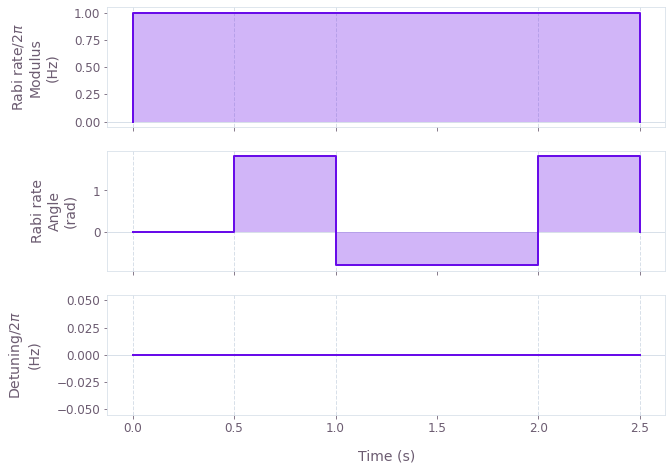

In [7]:
formatted_plot_data = bb1_x.export(
    coordinates="cylindrical", dimensionless_rabi_rate=False
)
plot_controls(formatted_plot_data)

### Exporting a Driven Control

Q-CTRL Open Controls enables exporting driven controls in CSV or JSON format.

Q-CTRL Open Controls can export a driven control in either `cartesian` or `cylindrical` coordinates. For details, consult the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/DrivenControl.export_to_file.html).

In the example below, we chose the `bb1_x` control (created above) for exporting to a CSV file.

In [8]:
file_type = "CSV"
filename = "example_driven_control.csv"

bb1_x.export_to_file(filename=filename, file_type=file_type, coordinates="cartesian")

In [9]:
## Reload the file and check its content to better understand the format
with open(filename, "rt") as handle:
    file_content = handle.readlines()
for line in file_content:
    print(line)

amplitude_x,amplitude_y,detuning,duration,maximum_rabi_rate

1.0,0.0,0.0,0.5,6.283185307179586

-0.2499999999999999,0.9682458365518543,0.0,0.5,6.283185307179586

0.6874999999999996,-0.7261843774138911,0.0,1.0,6.283185307179586

-0.2499999999999999,0.9682458365518543,0.0,0.5,6.283185307179586



## Custom definition of a driven control

An arbitrary `DrivenControl` can be defined defined using arrays of `rabi_rotations`, `azimuthal_angles`, `detuning_rotations` and `durations`.

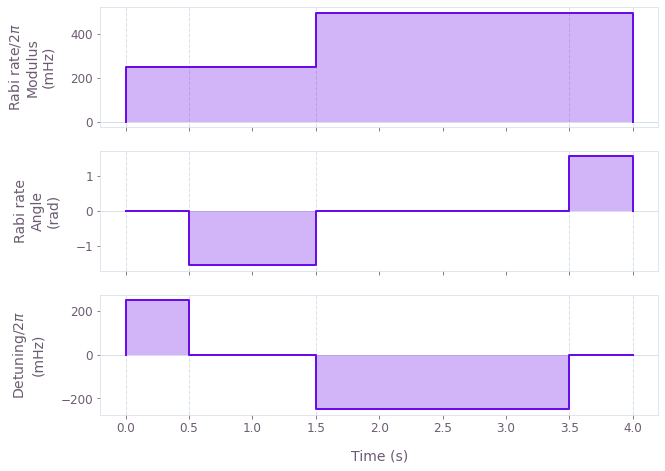

In [10]:
_rabi_rates = [np.pi / 2, np.pi / 2, np.pi, np.pi]
_azimuthal_angles = [0.0, -np.pi / 2, 0.0, np.pi / 2]
_detunings = [np.pi / 2, 0, -np.pi / 2, 0]
_durations = [0.5, 1, 2, 0.5]
_name = "Custon Driven Control"

custom_driven_control = DrivenControl(
    rabi_rates=_rabi_rates,
    azimuthal_angles=_azimuthal_angles,
    detunings=_detunings,
    durations=_durations,
    name=_name,
)

## let us plot and verify
formatted_plot_data = custom_driven_control.export(
    coordinates="cylindrical", dimensionless_rabi_rate=False
)
plot_controls(formatted_plot_data)